<center>Name:Quratulain<br>
Email:QuratulainkhanAIML1@hotmail.com<br>
Github:QuratulainkhanAIML1<br>
Title:Single Linear regression on titanic dataset by q</center>

Install Libraries

In [1]:
%pip install pandas
%pip install numpy
%pip install matplotlib.pyplot
%pip install seaborn
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score



Preprocessing data

In [3]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [4]:
titanic = titanic.dropna(subset=['age', 'fare'])

In [5]:
print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     714 non-null    int64   
 1   pclass       714 non-null    int64   
 2   sex          714 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        714 non-null    int64   
 5   parch        714 non-null    int64   
 6   fare         714 non-null    float64 
 7   embarked     712 non-null    object  
 8   class        714 non-null    category
 9   who          714 non-null    object  
 10  adult_male   714 non-null    bool    
 11  deck         184 non-null    category
 12  embark_town  712 non-null    object  
 13  alive        714 non-null    object  
 14  alone        714 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 70.2+ KB
None


In [6]:
titanic.isnull


<bound method DataFrame.isnull of      survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
885         0       3  female  39.0      0      5  29.1250        Q   Third   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult

In [7]:
print(titanic.describe())

         survived      pclass         age       sibsp       parch        fare
count  714.000000  714.000000  714.000000  714.000000  714.000000  714.000000
mean     0.406162    2.236695   29.699118    0.512605    0.431373   34.694514
std      0.491460    0.838250   14.526497    0.929783    0.853289   52.918930
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    1.000000   20.125000    0.000000    0.000000    8.050000
50%      0.000000    2.000000   28.000000    0.000000    0.000000   15.741700
75%      1.000000    3.000000   38.000000    1.000000    1.000000   33.375000
max      1.000000    3.000000   80.000000    5.000000    6.000000  512.329200


In [8]:
msa=titanic['age'].mean()
titanic['age'].fillna(msa,inplace=True)
titanic['age'].isnull().sum()

C:\Users\qurat\AppData\Local\Temp\ipykernel_12188\903099327.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(msa,inplace=True)
C:\Users\qurat\AppData\Local\Temp\ipykernel_12188\903099327.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['age'].fillna(msa,inplace=True)


np.int64(0)

In [9]:
FareMedian=titanic['fare'].median()
titanic['fare'].fillna(FareMedian, inplace=True)
titanic['fare'].isnull().sum()

C:\Users\qurat\AppData\Local\Temp\ipykernel_12188\2111384199.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['fare'].fillna(FareMedian, inplace=True)
C:\Users\qurat\AppData\Local\Temp\ipykernel_12188\2111384199.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['fare'].fillna(FareMedian, inplace=True)


np.int64(0)

In [10]:
titanic['age']=titanic['age'].apply(lambda x: x if x < 100 else msa)
titanic['age']=titanic['age'].apply(lambda x: x if x > 18 else msa)
titanic['age']

C:\Users\qurat\AppData\Local\Temp\ipykernel_12188\2847249190.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['age']=titanic['age'].apply(lambda x: x if x < 100 else msa)
C:\Users\qurat\AppData\Local\Temp\ipykernel_12188\2847249190.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['age']=titanic['age'].apply(lambda x: x if x > 18 else msa)


0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: age, Length: 714, dtype: float64

In [11]:
titanic['fare']=titanic['fare'].apply(lambda x: x if x < 20 else msa)
titanic['fare']=titanic['fare'].apply(lambda x: x if x > 40 else msa)
titanic['fare']

C:\Users\qurat\AppData\Local\Temp\ipykernel_12188\3460526483.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['fare']=titanic['fare'].apply(lambda x: x if x < 20 else msa)
C:\Users\qurat\AppData\Local\Temp\ipykernel_12188\3460526483.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['fare']=titanic['fare'].apply(lambda x: x if x > 40 else msa)


0      29.699118
1      29.699118
2      29.699118
3      29.699118
4      29.699118
         ...    
885    29.699118
886    29.699118
887    29.699118
889    29.699118
890    29.699118
Name: fare, Length: 714, dtype: float64

In [12]:
grp=titanic.groupby('age')['fare'].mean()
print(grp)

age
19.0    29.699118
20.0    29.699118
20.5    29.699118
21.0    29.699118
22.0    29.699118
          ...    
70.0    29.699118
70.5    29.699118
71.0    29.699118
74.0    29.699118
80.0    29.699118
Name: fare, Length: 65, dtype: float64


In [13]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     714 non-null    int64   
 1   pclass       714 non-null    int64   
 2   sex          714 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        714 non-null    int64   
 5   parch        714 non-null    int64   
 6   fare         714 non-null    float64 
 7   embarked     712 non-null    object  
 8   class        714 non-null    category
 9   who          714 non-null    object  
 10  adult_male   714 non-null    bool    
 11  deck         184 non-null    category
 12  embark_town  712 non-null    object  
 13  alive        714 non-null    object  
 14  alone        714 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 70.2+ KB


In [14]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,33.394506,0.512605,0.431373,29.699118
std,0.491460,0.838250,10.909075,0.929783,0.853289,0.000000
min,0.000000,1.000000,19.000000,0.000000,0.000000,29.699118
25%,0.000000,1.000000,26.000000,0.000000,0.000000,29.699118
50%,0.000000,2.000000,29.699118,0.000000,0.000000,29.699118
75%,1.000000,3.000000,38.000000,1.000000,1.000000,29.699118
max,1.000000,3.000000,80.000000,5.000000,6.000000,29.699118


In [15]:
X = titanic[['age']]  
Y = titanic['fare']   

In [31]:
model = LinearRegression()

In [32]:
model.fit(X,Y)

LinearRegression()

In [33]:
Y_pred = model.predict(X)
Y_pred

array([29.69911765, 29.69911765, 29.69911765, 29.69911765, 29.69911765,
       29.69911765, 29.69911765, 29.69911765, 29.69911765, 29.69911765,
       29.69911765, 29.69911765, 29.69911765, 29.69911765, 29.69911765,
       29.69911765, 29.69911765, 29.69911765, 29.69911765, 29.69911765,
       29.69911765, 29.69911765, 29.69911765, 29.69911765, 29.69911765,
       29.69911765, 29.69911765, 29.69911765, 29.69911765, 29.69911765,
       29.69911765, 29.69911765, 29.69911765, 29.69911765, 29.69911765,
       29.69911765, 29.69911765, 29.69911765, 29.69911765, 29.69911765,
       29.69911765, 29.69911765, 29.69911765, 29.69911765, 29.69911765,
       29.69911765, 29.69911765, 29.69911765, 29.69911765, 29.69911765,
       29.69911765, 29.69911765, 29.69911765, 29.69911765, 29.69911765,
       29.69911765, 29.69911765, 29.69911765, 29.69911765, 29.69911765,
       29.69911765, 29.69911765, 29.69911765, 29.69911765, 29.69911765,
       29.69911765, 29.69911765, 29.69911765, 29.69911765, 29.69

Evaluation Metrices

In [34]:
mae = mean_absolute_error(Y, Y_pred)
mse = mean_squared_error(Y,Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y,Y_pred)

In [35]:
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Coefficient of Determination (R²): {r2}")

Mean Absolute Error (MAE): 0.0
Mean Squared Error (MSE): 0.0
Root Mean Squared Error (RMSE): 0.0
Coefficient of Determination (R²): 1.0


Visualization

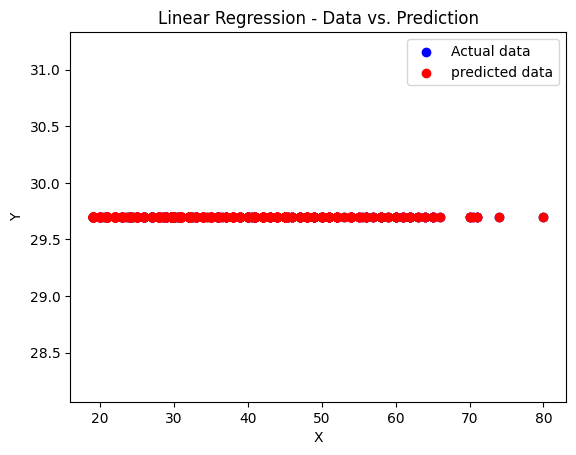

In [36]:
# Plot the original data points
plt.scatter(X, Y, color='blue', label='Actual data')


plt.scatter(X,Y_pred  , color='red', label='predicted data')
# Adding labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression - Data vs. Prediction')

# Display legend
plt.legend()

# Show the plot
plt.show()

MAE,MSE,RMSE equals to 0 and r2_score is 1 which indicates that this model works in best way.There is no difference between actual and predicted value that presents a horizontal line o the graph.

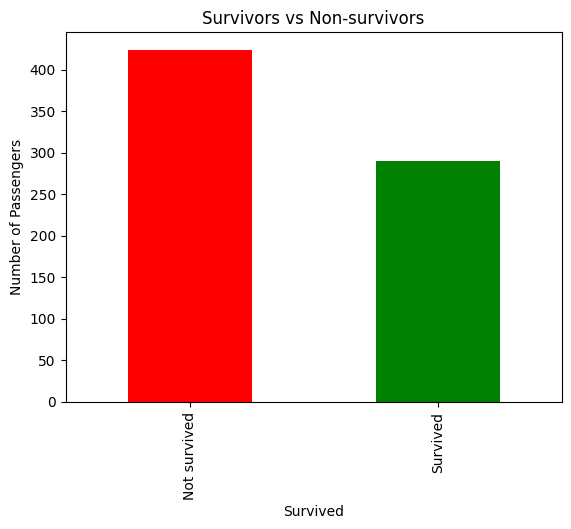

In [37]:
survival_counts=titanic['survived'].value_counts()
survival_counts.plot(kind='bar',color=['red','green'])
plt.xlabel('Survived')
plt.ylabel('Number of Passengers')
plt.title('Survivors vs Non-survivors')
#Adjust xtickets to show labels
plt.xticks(ticks=[0,1],labels=['Not survived','Survived'])
plt.show()